In [1]:
import zipfile
import pandas as pd

In [2]:
zip_file_path = 'data/BindingDB_All_202409_tsv.zip'
tsv_file_name = 'BindingDB_All.tsv'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as z:
    # Open the TSV file within the zip
    with z.open(tsv_file_name) as file:
        # Read the TSV file into a DataFrame
        df = pd.read_csv(file, sep='\t', on_bad_lines='skip')

# Display the DataFrame
df.head()

/tmp/ipykernel_2081/3747138030.py:9: DtypeWarning: Columns (8,9,10,11,12,13,15,17,20,21,22,23,27,28,32,33,35,36,45,46,47,48,50,51,52,53,54,55,57,58,59,60,62,63,64,65,66,67,69,70,71,72,74,75,76,77,78,79,81,82,83,86,87,88,89,90,91,93,94,95,98,99,100,101,102,103,105,106,107,110,111,112,113,114,115,117,118,119,122,123,124,125,126,127,129,130,131,134,135,136,137,138,139,146,147,148,149,150,151,158,159,160,161,162,163,170,172,173,174,175) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t', on_bad_lines='skip')


,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,Ki (nM),IC50 (nM),...,UniProt (SwissProt) Recommended Name of Target Chain.12,UniProt (SwissProt) Entry Name of Target Chain.12,UniProt (SwissProt) Primary ID of Target Chain.12,UniProt (SwissProt) Secondary ID(s) of Target Chain.12,UniProt (SwissProt) Alternative ID(s) of Target Chain.12,UniProt (TrEMBL) Submitted Name of Target Chain.12,UniProt (TrEMBL) Entry Name of Target Chain.12,UniProt (TrEMBL) Primary ID of Target Chain.12,UniProt (TrEMBL) Secondary ID(s) of Target Chain.12,UniProt (TrEMBL) Alternative ID(s) of Target Chain.12
0,1,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CCCCCC(O)=...,InChI=1S/C31H42N2O7/c34-27(35)17-9-3-11-19-32-...,XGEGDSLAQZJGCW-HHGOQMMWSA-N,608734,"6-[(4R,5S,6S,7R)-4,7-dibenzyl-3-(5-carboxypent...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.24,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...,InChI=1S/C31H34N6O3/c38-29-27(17-23-9-3-1-4-10...,UZLMEAPBHYEHAC-UNTBESQGSA-N,22,"(4R,5S,6S,7R)-4,7-dibenzyl-5,6-dihydroxy-1,3-b...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.25,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...,InChI=1S/C29H34N4O3/c34-27-25(16-21-8-3-1-4-9-...,HYNYUFZPPJMPOB-UTWJFGBXSA-N,23,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.41,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...,InChI=1S/C29H40N2O4/c32-18-10-2-1-9-17-30-25(1...,YXVAZXDWVZTGGD-VIJSPRBVSA-N,24,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...,InChI=1S/C28H38N2O4/c31-17-9-3-8-16-29-24(18-2...,WWTSWTPNILRSJX-XDZXDJIYSA-N,25,"(4R,5S,6S,7R)-4,7-dibenzyl-1-(cyclopropylmethy...",Dimer of Gag-Pol polyprotein [501-599],Human immunodeficiency virus 1,0.99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
columns = df.columns
col = columns[16]

In [47]:
df[col].unique()

def explore_column(i, return_unique = False):
    column_name = columns[i]
    print(f'# {column_name}')

    nb_nan = df[column_name].isna().sum()
    print(f'{nb_nan} nan values ({round(nb_nan/len(df)*100,2)}%)')

    unique_values = df[column_name].unique()
    nb_unique_values = len(unique_values)
    print(f'{nb_unique_values} unique values')
    if nb_unique_values < 25:
        print(unique_values)

    if return_unique:
        return unique_values

def quick_check_column(i, treshold = 100):
    column_name = columns[i]
    nb_nan = df[column_name].isna().sum()
    percent_nan = nb_nan/len(df)*100
    if percent_nan < treshold:
        print(f'# {column_name}')
        print(f'{nb_nan} nan values ({round(nb_nan/len(df)*100,2)}%)')
        unique_values = df[column_name].unique()
        nb_unique_values = len(unique_values)
        print(f'{nb_unique_values} unique values')
        if nb_unique_values < 25:
            print(unique_values)

In [40]:
for i in range(16, 26):
    explore_column(i)
    print()

# Curation/DataSource
0 nan values (0.0%)
9 unique values
['Curated from the literature by BindingDB' 'US Patent' 'PubChem'
 'PDSP Ki' 'Taylor Research Group, UCSD' 'CSAR' 'D3R' 'WIPO' 'ChEMBL']

# Article DOI
1359630 nan values (46.67%)
40728 unique values

# BindingDB Entry DOI
6121 nan values (0.21%)
51827 unique values

# PMID
1297514 nan values (44.54%)
41732 unique values

# PubChem AID
1755915 nan values (60.28%)
12911 unique values

# Patent Number
1774810 nan values (60.93%)
7335 unique values

# Authors
42804 nan values (1.47%)
47335 unique values

# Institution
42804 nan values (1.47%)
8510 unique values

# Link to Ligand in BindingDB
0 nan values (0.0%)
1264593 unique values

# Link to Target in BindingDB
0 nan values (0.0%)
9730 unique values



In [41]:
for i in range(26, 36):
    explore_column(i)
    print()

# Link to Ligand-Target Pair in BindingDB
0 nan values (0.0%)
2122813 unique values

# Ligand HET ID in PDB
2742075 nan values (94.13%)
14377 unique values

# PDB ID(s) for Ligand-Target Complex
2760623 nan values (94.77%)
13781 unique values

# PubChem CID
55456 nan values (1.9%)
1218127 unique values

# PubChem SID
55232 nan values (1.9%)
1230929 unique values

# ChEBI ID of Ligand
2816149 nan values (96.67%)
3275 unique values

# ChEMBL ID of Ligand
1807242 nan values (62.04%)
428486 unique values

# DrugBank ID of Ligand
2825587 nan values (97.0%)
2617 unique values

# IUPHAR_GRAC ID of Ligand
2804837 nan values (96.29%)
2276 unique values

# KEGG ID of Ligand
2812973 nan values (96.56%)
3070 unique values



In [42]:
for i in range(36, 46):
    explore_column(i)
    print()

# ZINC ID of Ligand
1745679 nan values (59.93%)
439829 unique values

# Number of Protein Chains in Target (>1 implies a multichain complex)
0 nan values (0.0%)
12 unique values
[ 1  2  3  4  5  9 11  8  6 12  7 10]

# BindingDB Target Chain Sequence
0 nan values (0.0%)
8810 unique values

# PDB ID(s) of Target Chain
623813 nan values (21.41%)
4851 unique values

# UniProt (SwissProt) Recommended Name of Target Chain
86364 nan values (2.96%)
4236 unique values

# UniProt (SwissProt) Entry Name of Target Chain
87174 nan values (2.99%)
6532 unique values

# UniProt (SwissProt) Primary ID of Target Chain
86364 nan values (2.96%)
6531 unique values

# UniProt (SwissProt) Secondary ID(s) of Target Chain
374060 nan values (12.84%)
4903 unique values

# UniProt (SwissProt) Alternative ID(s) of Target Chain
2913040 nan values (100.0%)
1 unique values
[nan]

# UniProt (TrEMBL) Submitted Name of Target Chain
2815772 nan values (96.66%)
674 unique values



In [43]:
for i in range(46, 63):
    explore_column(i)
    print()

# UniProt (TrEMBL) Entry Name of Target Chain
2815772 nan values (96.66%)
1011 unique values

# UniProt (TrEMBL) Primary ID of Target Chain
2814016 nan values (96.6%)
1024 unique values

# UniProt (TrEMBL) Secondary ID(s) of Target Chain
2903682 nan values (99.68%)
132 unique values

# UniProt (TrEMBL) Alternative ID(s) of Target Chain
2913040 nan values (100.0%)
1 unique values
[nan]

# BindingDB Target Chain Sequence.1
2760094 nan values (94.75%)
695 unique values

# PDB ID(s) of Target Chain.1
2791406 nan values (95.82%)
484 unique values

# UniProt (SwissProt) Recommended Name of Target Chain.1
2761478 nan values (94.8%)
488 unique values

# UniProt (SwissProt) Entry Name of Target Chain.1
2761478 nan values (94.8%)
592 unique values

# UniProt (SwissProt) Primary ID of Target Chain.1
2761478 nan values (94.8%)
592 unique values

# UniProt (SwissProt) Secondary ID(s) of Target Chain.1
2777375 nan values (95.34%)
485 unique values

# UniProt (SwissProt) Alternative ID(s) of Target C

In [48]:
for i in range(52, len(columns)):
    quick_check_column(i)
    print()

# UniProt (SwissProt) Recommended Name of Target Chain.1
2761478 nan values (94.8%)
488 unique values

# UniProt (SwissProt) Entry Name of Target Chain.1
2761478 nan values (94.8%)
592 unique values

# UniProt (SwissProt) Primary ID of Target Chain.1
2761478 nan values (94.8%)
592 unique values

# UniProt (SwissProt) Secondary ID(s) of Target Chain.1
2777375 nan values (95.34%)
485 unique values


# UniProt (TrEMBL) Submitted Name of Target Chain.1
2911997 nan values (99.96%)
25 unique values

# UniProt (TrEMBL) Entry Name of Target Chain.1
2911997 nan values (99.96%)
31 unique values

# UniProt (TrEMBL) Primary ID of Target Chain.1
2911960 nan values (99.96%)
32 unique values

# UniProt (TrEMBL) Secondary ID(s) of Target Chain.1
2913028 nan values (100.0%)
4 unique values
[nan 'A0A504X2A8' 'A0A0J3WG59 A0A379YRW0' 'B5DFI9']


# BindingDB Target Chain Sequence.2
2877558 nan values (98.78%)
228 unique values

# PDB ID(s) of Target Chain.2
2891428 nan values (99.26%)
117 unique values

# 

## More details

# Number of Protein Chains in Target (>1 implies a multichain complex)
0 nan values (0.0%)
12 unique values
[ 1  2  3  4  5  9 11  8  6 12  7 10]


<Axes: title={'center': 'Number of Protein Chains in Target'}, ylabel='Frequency'>

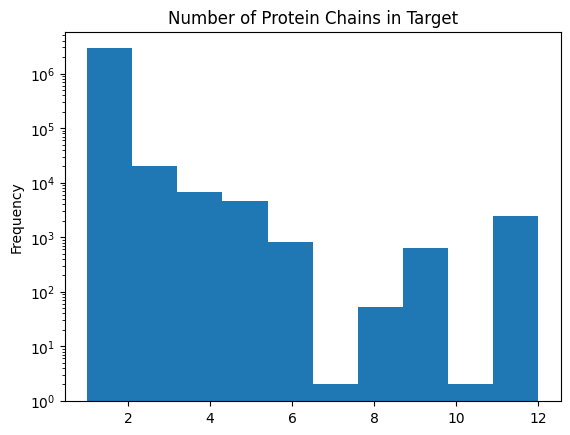

In [59]:
# Multi chain
i = 37
explore_column(i)

column = df[columns[i]]
column.plot(kind='hist', logy=True, title="Number of Protein Chains in Target")

In [61]:
explore_column(21)

# Patent Number
1774810 nan values (60.93%)
7335 unique values
